<a href="https://colab.research.google.com/github/osh9149/2021_cs/blob/main/01_2_%ED%81%AC%EB%A1%A4%EB%A7%81%EA%B3%BC_%EC%8A%A4%ED%81%AC%EB%A0%88%EC%9D%B4%ED%95%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[3장 크롤링과 스크레이핑]**

**1. 데이터 다운로드**
### 웹사이트에 있는 데이터를 다운로드하기 위해 urllib사용(url을 다루는 모듈을 모아놓은 패키지)




In [ ]:
# 라이브러리 읽어 들이기 --- (※1)
import urllib.request

# URL과 저장 경로 지정하기
url = "https://search.pstatic.net/common/?src=http%3A%2F%2Fshop1.phinf.naver.net%2F20201118_300%2F16056645626493NarR_JPEG%2F6800451355458019_1906602179.jpg&type=sc960_832"
savename = "test.png"

# 다운로드 --- (※2)
urllib.request.urlretrieve(url, savename)
print("저장되었습니다...!")

저장되었습니다...!


In [ ]:
import urllib.request 
# URL과 저장 경로 지정하기
url = "https://search.pstatic.net/common/?src=http%3A%2F%2Fshop1.phinf.naver.net%2F20201118_300%2F16056645626493NarR_JPEG%2F6800451355458019_1906602179.jpg&type=sc960_832"
savename = "test.png"

# 다운로드 --- (※1)
mem = urllib.request.urlopen(url).read()

# 파일로 저장하기 --- (※2)
with open(savename, mode="wb") as f:
    f.write(mem)
    print("저장되었습니다...!")

저장되었습니다...!


### 웹에서 데이터 추출하기


<!doctype html>                 <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메인에서 다양한 정
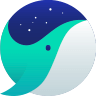
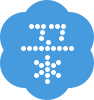

In [ ]:
# IP 확인 API로 접근해서 결과 출력하기
# 모듈 읽어 들이기 --- (※1)
import urllib.request

# 데이터 읽어 들이기 --- (※2)
url = "https://www.naver.com/"

res = urllib.request.urlopen(url)
data = res.read()

# 바이너리를 문자열로 변환하기 --- (※3)
text = data.decode("utf-8")
print(text)

### BeautifulSoup스크레이핑하기

  스크레이핑이란 웹사이트에서 데이터를 추출하고 원하는 정보를 출하는 것입니다.
  BeautifulSoup Library를 먼저 설치해야합니다.

In [ ]:
pip install BeautifulSoup4

In [ ]:
from bs4 import BeautifulSoup
import urllib.request as req

url = "https://www.naver.com/"

# urlopen()으로 데이터 가져오기 --- (※1)
res = req.urlopen(url)

# BeautifulSoup으로 분석하기 --- (※2)
soup = BeautifulSoup(res, "html.parser")

# 원하는 데이터 추출하기 --- (※3)
title = soup.find("title").string

print(title)


NAVER


*   웹사이트 소스보기-개발자도구, F12
*   CSS선택자
*   HTML구조를 확인한 후 마우스오른쪽버튼을 눌러 Copy>Copy Selector를 선택하여 CSS선택자를 클립보드에 복사한다.



### 위키 문헌 홈페이지에 있는 윤동주의 작품목록을 스크레이핑

In [ ]:


from bs4 import BeautifulSoup 
import urllib.request as req
# 뒤의 인코딩 부분은 "저자:윤동주"라는 의미입니다.
# 따로 입력하지 말고 위키 문헌 홈페이지에 들어간 뒤에 주소를 복사해서 사용하세요.
url = "https://ko.wikisource.org/wiki/%EC%A0%80%EC%9E%90:%EC%9C%A4%EB%8F%99%EC%A3%BC"
res = req.urlopen(url)
soup = BeautifulSoup(res, "html.parser")

# #mw-content-text 바로 아래에 있는 
# ul 태그 바로 아래에 있는
# li 태그 아래에 있는
# a 태그를 모두 선택합니다.
a_list = soup.select("#mw-content-text > div > ul > li a")
print(a_list)
for a in a_list:
    name = a.string
    print("-", name)

[<a href="/wiki/%ED%95%98%EB%8A%98%EA%B3%BC_%EB%B0%94%EB%9E%8C%EA%B3%BC_%EB%B3%84%EA%B3%BC_%EC%8B%9C" title="하늘과 바람과 별과 시">하늘과 바람과 별과 시</a>, <a href="/wiki/%ED%95%98%EB%8A%98%EA%B3%BC_%EB%B0%94%EB%9E%8C%EA%B3%BC_%EB%B3%84%EA%B3%BC_%EC%8B%9C_(1955%EB%85%84)" title="하늘과 바람과 별과 시 (1955년)">증보판</a>, <a href="/wiki/%ED%95%98%EB%8A%98%EA%B3%BC_%EB%B0%94%EB%9E%8C%EA%B3%BC_%EB%B3%84%EA%B3%BC_%EC%8B%9C/%EC%84%9C%EC%8B%9C" title="하늘과 바람과 별과 시/서시">서시</a>, <a href="/wiki/%ED%95%98%EB%8A%98%EA%B3%BC_%EB%B0%94%EB%9E%8C%EA%B3%BC_%EB%B3%84%EA%B3%BC_%EC%8B%9C/%EC%9E%90%ED%99%94%EC%83%81" title="하늘과 바람과 별과 시/자화상">자화상</a>, <a href="/wiki/%ED%95%98%EB%8A%98%EA%B3%BC_%EB%B0%94%EB%9E%8C%EA%B3%BC_%EB%B3%84%EA%B3%BC_%EC%8B%9C/%EC%86%8C%EB%85%84" title="하늘과 바람과 별과 시/소년">소년</a>, <a href="/wiki/%ED%95%98%EB%8A%98%EA%B3%BC_%EB%B0%94%EB%9E%8C%EA%B3%BC_%EB%B3%84%EA%B3%BC_%EC%8B%9C/%EB%88%88_%EC%98%A4%EB%8A%94_%EC%A7%80%EB%8F%84" title="하늘과 바람과 별과 시/눈 오는 지도">눈 오는 지도</a>, <a href="/wiki/%ED%95%98%EB%8A%98%EA%B3%BC_%EB

*   링크한꺼번에 다운로드

*   로그인이 필요한 사이트에서 다운받기

In [ ]:
# 로그인을 위한 모듈 추출하기
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

# 아이디와 비밀번호 지정하기[자신의 것을 사용해주세요] --- (※1)
USER = "<아이디>"
PASS = "<비밀번호>"

# 세션 시작하기 --- (※2)
session = requests.session()

# 로그인하기 --- (※3)
login_info = {
    "m_id": USER,  # 아이디 지정
    "m_passwd": PASS  # 비밀번호 지정
}

url_login = "http://www.hanbit.co.kr/member/login_proc.php"
res = session.post(url_login, data=login_info)
res.raise_for_status() # 오류가 발생하면 예외가 발생합니다.

# 마이페이지에 접근하기 --- (※4)
url_mypage = "http://www.hanbit.co.kr/myhanbit/myhanbit.html" 
res = session.get(url_mypage)
res.raise_for_status()

# 마일리지와 이코인 가져오기 --- (※5)
soup = BeautifulSoup(res.text, "html.parser")
mileage = soup.select_one(".mileage_section1 span").get_text()
ecoin = soup.select_one(".mileage_section2 span").get_text()
print("마일리지: " + mileage)
print("이코인: " + ecoin)

*   웹브라우저를 이용한 스크레이핑
*   웹브라우저 원격조작에 사용되는 Selenium
*   참고자료 Selenium with python : https://selenium-python.readthedocs.io/


*   웹API로 데이터 추출하기
*   웹API(Application Programming Interface)는 어떤 사이트가 가지고 있는 기능을 외부에서도 쉽게 사용할 수 있게 공개한 것
*   보통 개발자로 등록하고 API키를 발급받아야 사용이 가능하다


*   국내에서 사용할 수 있는 웹API
*   네이버개발자센터
*   다음 개발자센터
*   카카오개발자센터
*   다나와, 옥션 쇼핑정보 제공
*   주소전환 : 행정자치부, 우체국

In [ ]:
데이터